# Notebook final : Faire une représentation graphique de la loi de Von Mises

Afin de s'assurer qu'on représente bien ce qui se passe en interne, la fonction utilisée pour faire la Von Mises dans le réseau est copiée collée et montrée graphiquement

On importe les bibliothèques :

In [2]:
import numpy as np
import pyNN.nest as sim
from pyNN.random import NumpyRNG
from pyNN.random import RandomDistribution as rnd
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
import lmfit
import matplotlib.gridspec as gridspec

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/home/hugo/.local/lib/python3.7/site-packages/pyNN/nest/__init__.py:55: UserWarning: Unable to install NEST extensions. Certain models may not be available.
Further details: DictError in SLIInterpreter::execute: Key '/Install' does not exist in dictionary.
  warnings.warn("Unable to install NEST extensions. Certain models may not be available.\nFurther details: {}".format(err))


On défini la fonction de Von Mises, telle qu'elle est également implémentée dans les simulations

In [3]:
def tuning_function(x, j, B, fmax):  # von mises
    N = len(x)
    if B == np.inf:
        VM = np.ones_like(x)
    else:
        VM = np.exp((np.cos(2.*np.pi*(x-j)/N)-1.)/4/(B*np.pi/180)**2)
    #VM /= VM.sum(axis=0)
    return fmax * VM

Et on affiche le résultat

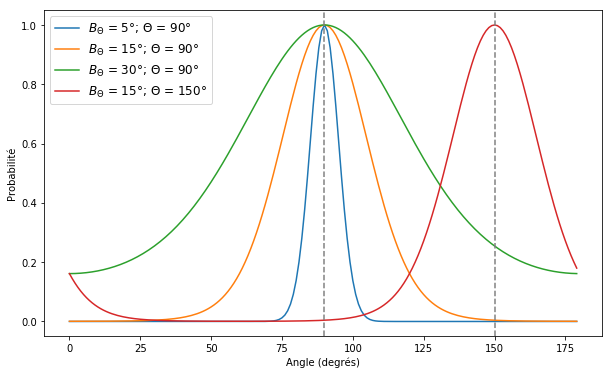

In [31]:
plt.figure(figsize = (10,6))
plt.plot(tuning_function(1. * np.arange(180),
                         90, 5, 1),
        label = '$B_\Theta$ = 5°; $\Theta$ = 90°')
plt.plot(tuning_function(1. * np.arange(180),
                         90, 15, 1),
        label = '$B_\Theta$ = 15°; $\Theta$ = 90°')
plt.plot(tuning_function(1. * np.arange(180),
                         90, 30, 1),
        label = '$B_\Theta$ = 30°; $\Theta$ = 90°')

plt.plot(tuning_function(1. * np.arange(180),
                         150, 15, 1),
        label = '$B_\Theta$ = 15°; $\Theta$ = 150°')

plt.axvline(90, linestyle = '--', color = 'gray')
plt.axvline(150, linestyle = '--', color = 'gray')

plt.legend(fontsize = 12)
plt.xlabel('Angle (degrés)')
plt.ylabel('Probabilité')

plt.savefig('./figs/FINAL_Von_mises.pdf', format = 'pdf', dpi = 200, bbox_inches = 'tight')